In [100]:
from sklearn.datasets import fetch_openml

# Fetch MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
# Access features (pixel values) and labels
X, y = mnist['data'].astype('float32')/255, mnist['target'].astype('int')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [101]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Label and Image Transformation
def transform_labels(y):
  return np.eye(10)[y]

def flatten_images(X):
  return np.hstack((np.ones((X.shape[0], 1)), X))

# Data Partitioning, Flattenning
def data_preparation():
  return train_test_split(
      flatten_images(X), y, test_size=10000)

class Perceptron:
  def __init__(self, X_train, y_train, X_test, y_test, d, max_itirations):
    self.X_train = X_train
    self.y_train = np.where(y_train == d, 1, -1)
    self.X_test = X_test
    self.y_test = np.where(y_test == d, 1, -1)
    self.d = d
    self.max_iterations = max_itirations
    self._w = np.zeros(self.X_train.shape[1])

  # Calculate the empirical error
  def get_loss(self, w, X, y):
    return np.mean(np.sign(X @ w) != y)

  def pocet_algorithm(self):
    self.w_pocket = np.copy(self._w)
    best_error = self.get_loss(self._w, self.X_train, self.y_train)
    best_test = self.get_loss(self._w, self.X_test, self.y_test)
    self.training_losses = [best_error]
    self.test_losses = [best_test]


    for _ in range(self.max_iterations):
        misclassified = np.where(np.sign(self.X_train @ self._w) != self.y_train)[0]
        if len(misclassified) == 0:
            break

        idx = np.random.choice(misclassified)

        self._w += self.y_train[idx] * self.X_train[idx]

        # Evaluate performance on training set
        training_loss = self.get_loss(self._w, self.X_train, self.y_train)

        # Evaluate performance on test set
        test_loss = self.get_loss(self._w, self.X_test, self.y_test)

        # Update pocket if the current weight performs better
        if training_loss < best_error:
            best_error = training_loss
            best_test = test_loss
            self.w_pocket = np.copy(self._w)

        self.training_losses.append(best_error)
        self.test_losses.append(best_test)

  def show(self):
    # Performance Visualization
    plt.figure(figsize=(10, 5))

    # Plot Losses
    plt.plot(self.training_losses[1:], label='Training Loss', color='blue')
    plt.plot(self.test_losses[1:], '--', label='Test Loss', color='orange')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title(f'Loss Over Iterations for {self.d}')
    plt.legend()
    plt.show()


In [102]:
X_train, X_test, y_train, y_test = data_preparation()

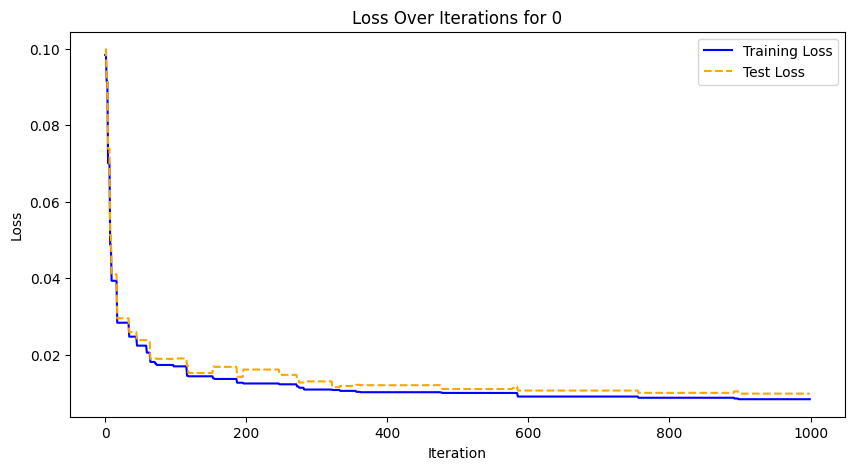

In [103]:
p = Perceptron(X_train, y_train, X_test, y_test, 0, 1000)
p.pocet_algorithm()
p.show()

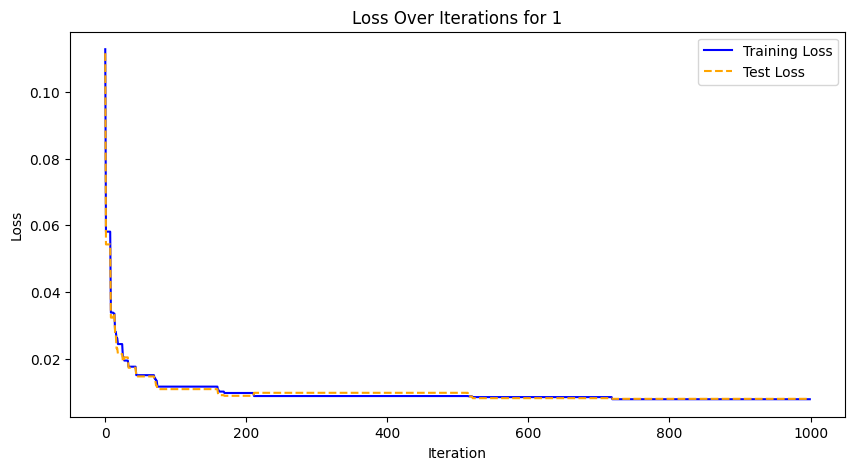

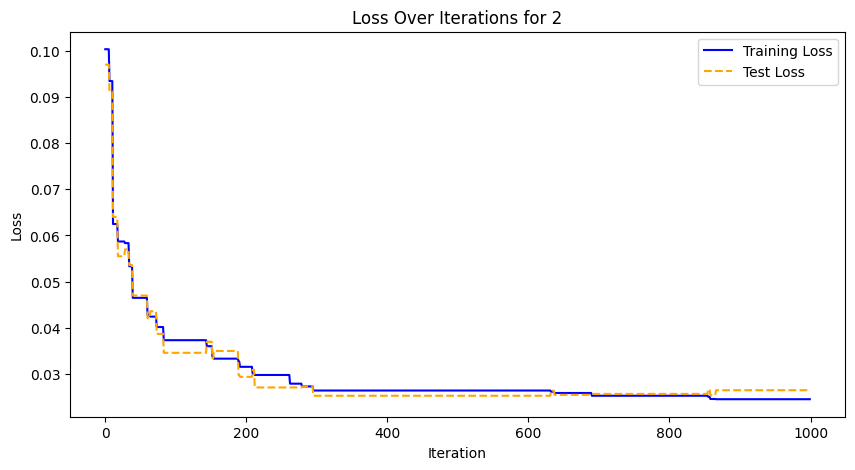

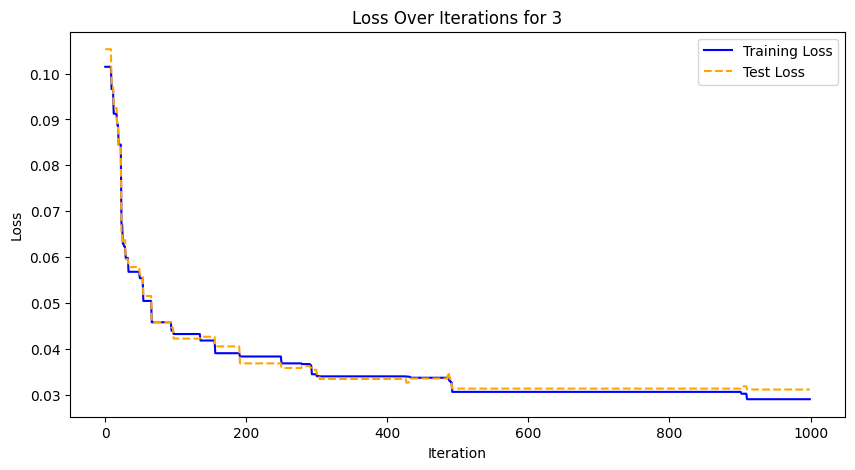

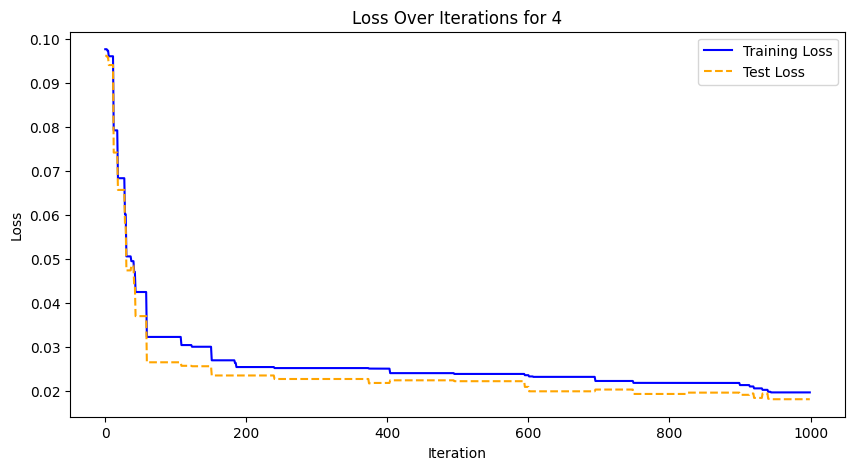

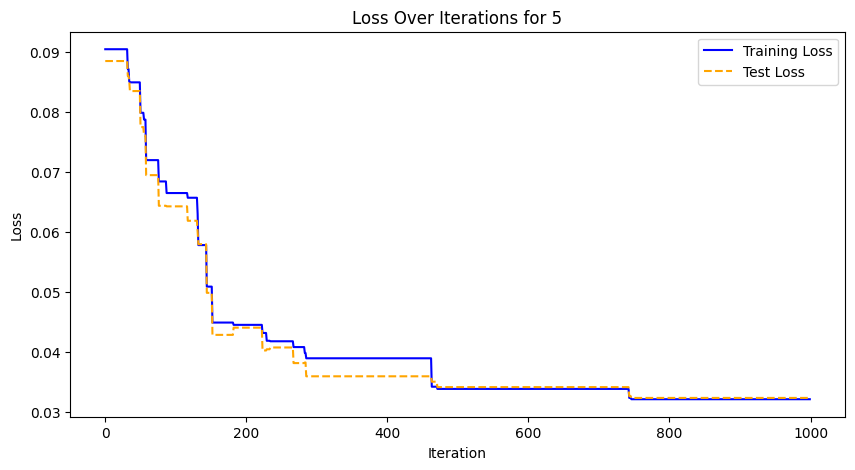

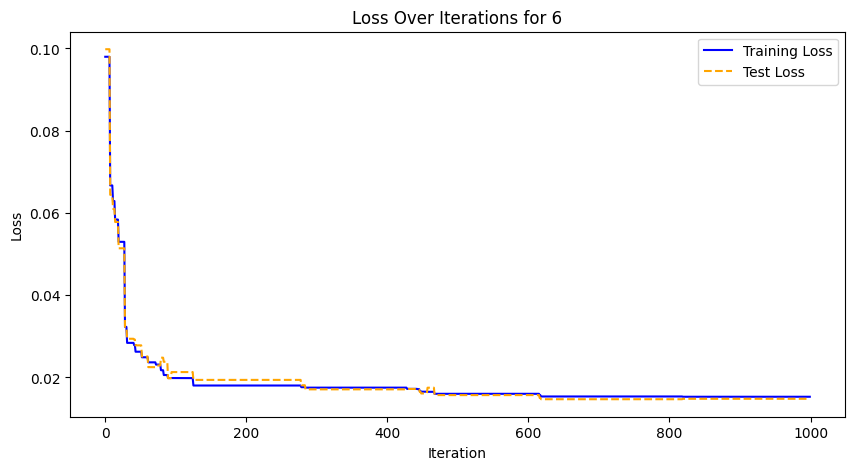

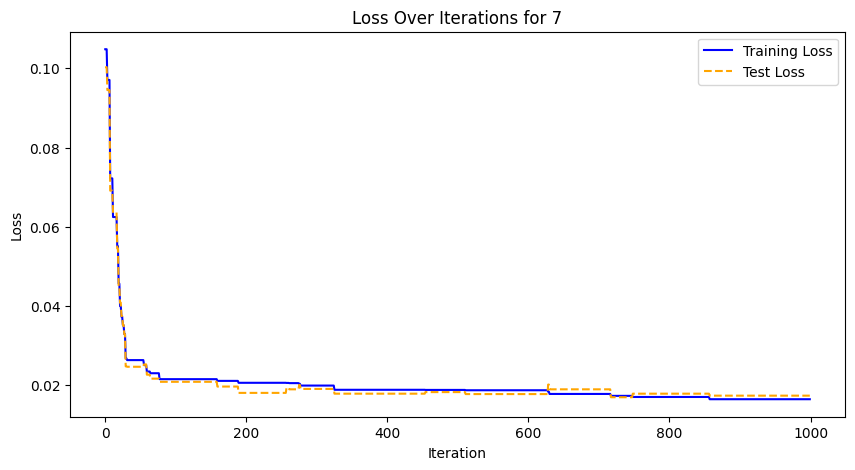

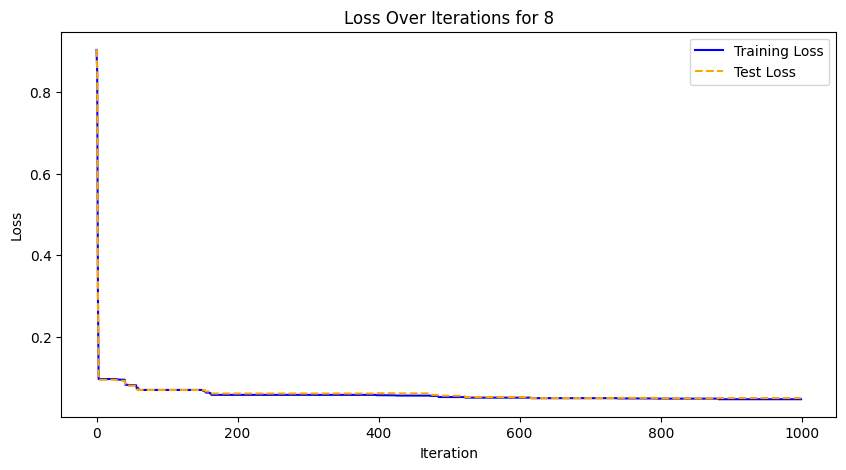

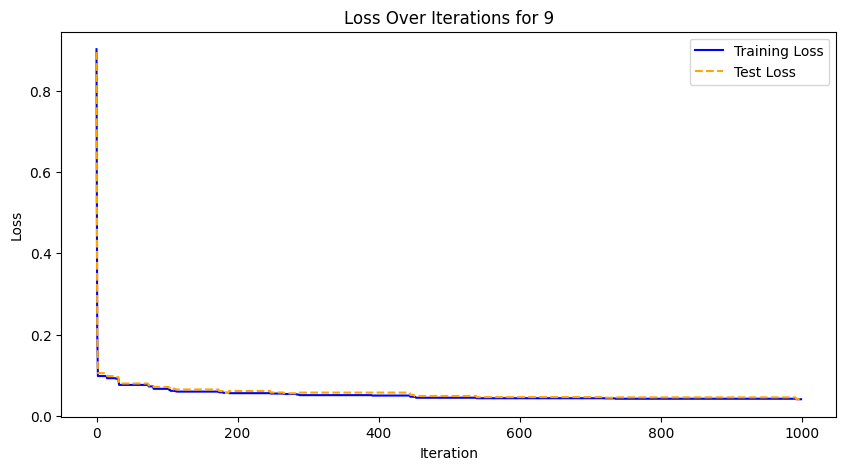

In [104]:
W = []
W.append(p.w_pocket)
for i in range(1, 10):
  p = Perceptron(X_train, y_train, X_test, y_test, i, 1000)
  p.pocet_algorithm()
  p.show()
  W.append(p.w_pocket)

In [ ]:
#A1. Apply the multi-class perceptron algorithm to address the MNIST classification problem:
def predict(X):
  return np.argmax([X @ W[j] for j in range(10)])


for i in range(X_test.shape[0]):
  print(predict(X_test[i]), y_test.values[i])
  print("##############")

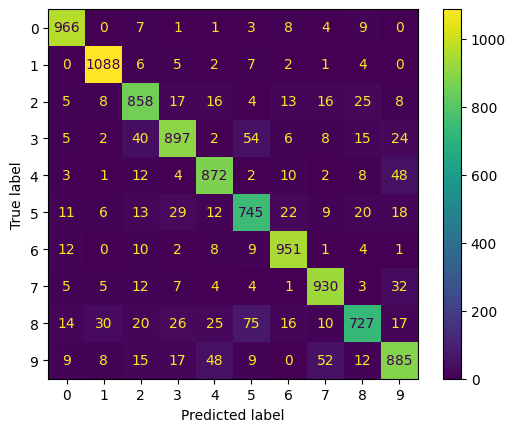

ACC: 89.19%


In [109]:
#A2. Compute the confusion matrix for the multi-class classification problem on the test data and determine the accuracy (ACC).
from sklearn import metrics


y_pred = np.array([predict(X_test[i]) for i in range(X_test.shape[0])])
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [i for i in range(10)])

cm_display.plot()
plt.show()

print(f"ACC: {metrics.accuracy_score(y_test, y_pred):.2%}")

For the digit 0 the confusion matrix is:


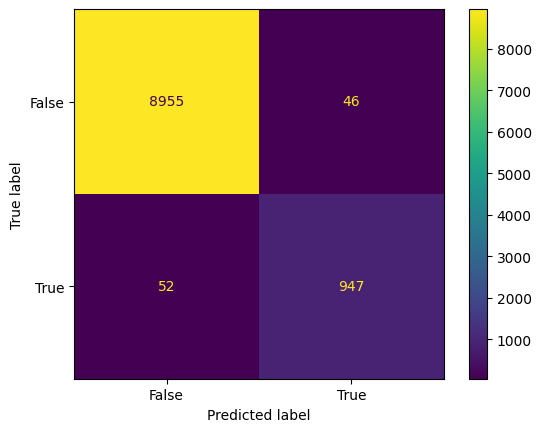

For the digit 0 the acc is: 99.02%
For the digit 0 the sensetivity is: 94.79%
############################################################
For the digit 1 the confusion matrix is:


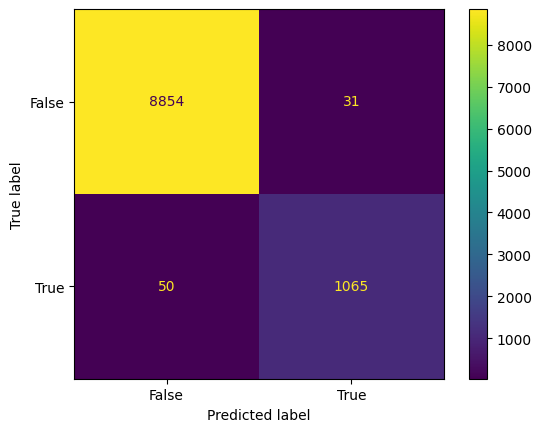

For the digit 1 the acc is: 99.19%
For the digit 1 the sensetivity is: 95.52%
############################################################
For the digit 2 the confusion matrix is:


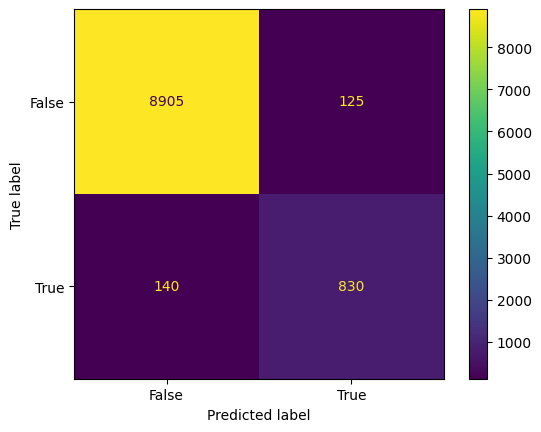

For the digit 2 the acc is: 97.35%
For the digit 2 the sensetivity is: 85.57%
############################################################
For the digit 3 the confusion matrix is:


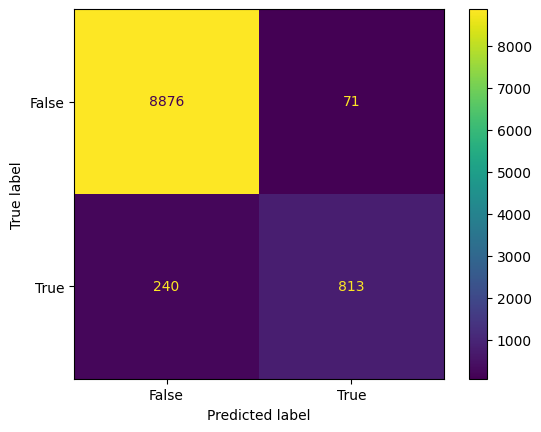

For the digit 3 the acc is: 96.89%
For the digit 3 the sensetivity is: 77.21%
############################################################
For the digit 4 the confusion matrix is:


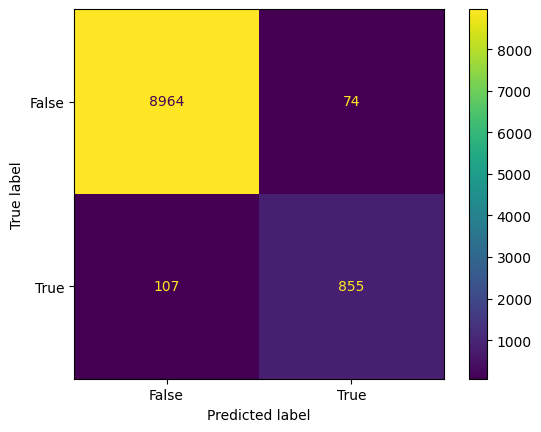

For the digit 4 the acc is: 98.19%
For the digit 4 the sensetivity is: 88.88%
############################################################
For the digit 5 the confusion matrix is:


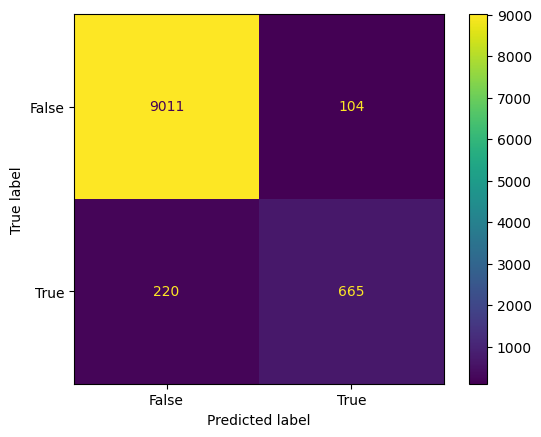

For the digit 5 the acc is: 96.76%
For the digit 5 the sensetivity is: 75.14%
############################################################
For the digit 6 the confusion matrix is:


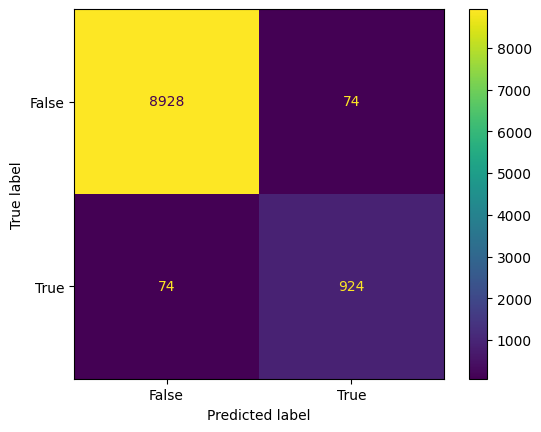

For the digit 6 the acc is: 98.52%
For the digit 6 the sensetivity is: 92.59%
############################################################
For the digit 7 the confusion matrix is:


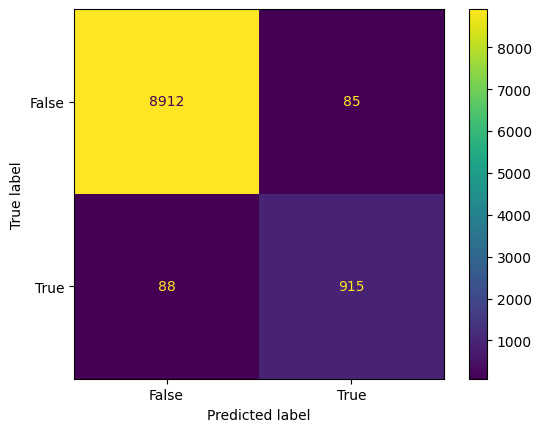

For the digit 7 the acc is: 98.27%
For the digit 7 the sensetivity is: 91.23%
############################################################
For the digit 8 the confusion matrix is:


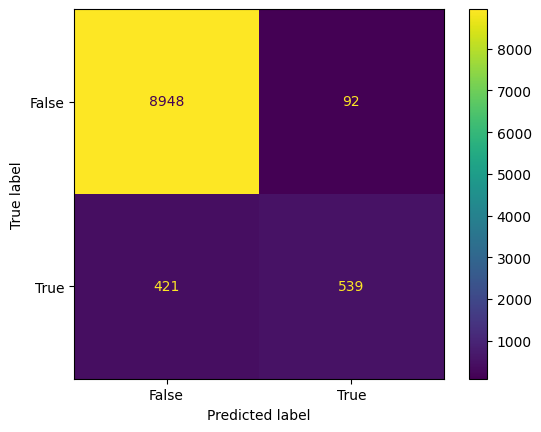

For the digit 8 the acc is: 94.87%
For the digit 8 the sensetivity is: 56.15%
############################################################
For the digit 9 the confusion matrix is:


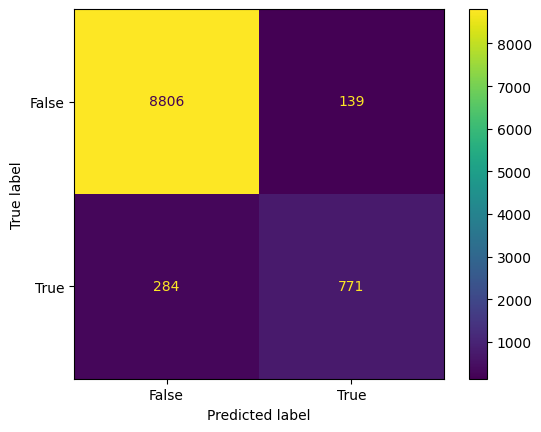

For the digit 9 the acc is: 95.77%
For the digit 9 the sensetivity is: 73.08%
############################################################


In [111]:
#A3. Generate the table of confusion for each digit, and calculate the sensitivity (True Positive Rate, TPR) for each class.

for i in range(10):
  y_pred = np.where(X_test @ W[i] > 0, 1, -1)
  y_true = np.where(y_test == i, 1, -1)
  confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
  print(f"For the digit {i} the confusion matrix is:")
  cm_display.plot()
  plt.show()
  TP = confusion_matrix[1,1] # true positive
  FN = confusion_matrix[1,0] # false negatives
  print(f"For the digit {i} the acc is: {metrics.accuracy_score(y_true, y_pred):.2%}")
  print(f"For the digit {i} the sensetivity is: {TP/(TP+FN):.2%}")
  print("#"*60)